# Jedha data 'speed dating' project

Purpose : To practice Pandas, Matplotlib and Seaborn libraries on dataset 'speed dating' from Kaggle : 
https://www.kaggle.com/annavictoria/speed-dating-experiment

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
speed_dating = pd.read_csv("Speed Dating Data.csv", encoding='ISO-8859-1')

In [10]:
speed_dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Personnal information analysis

Let's firstly look at information given by participants. As the dataset is one line by meeting, we firstly extract information for each 'iid' line :

In [12]:
features_perso = ['iid', 'gender', 'idg', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'goal', 'date', 'go_out', 'career', 'career_c', 'exphappy', 'expnum', 'attr1_1', 'attr4_1', 'attr2_1', 'attr3_1', 'attr5_1']
# as attractivity is the main feature for decision, we only take it (among sinc, intel, etc) due to lack of time

speed_dating[features_perso].head()

,iid,gender,idg,age,field,field_cd,race,imprace,imprelig,from,...,go_out,career,career_c,exphappy,expnum,attr1_1,attr4_1,attr2_1,attr3_1,attr5_1
0,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
1,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
2,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
3,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
4,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN


In [14]:
sd_group_iid = speed_dating[features_perso].groupby('iid').mean().reset_index()

## Importance of common religion (mark from 0 to 10)

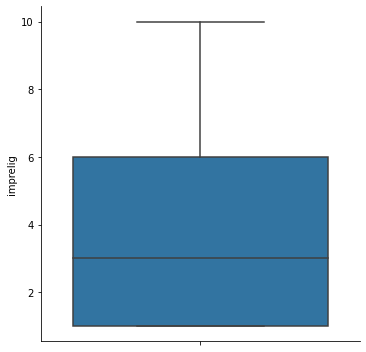

In [83]:
sns.catplot( y = 'imprelig', kind= 'box', data = sd_group_iid)
plt.show()

Religion doesn't seem to have a great importance among this population's sample, as 75% of them put a mark lower than 6. Let's look at the 'race' feature.

## Importance of common 'race' (mark from 0 to 10)

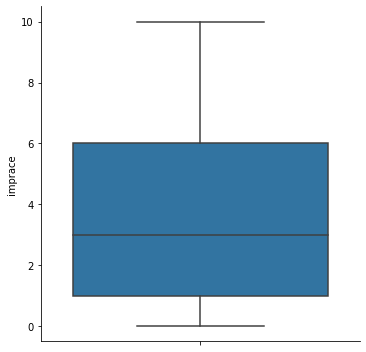

In [84]:
sns.catplot( y = 'imprace', kind= 'box', data = sd_group_iid)
plt.show()

Same conclusion as religion. Signification on match ?

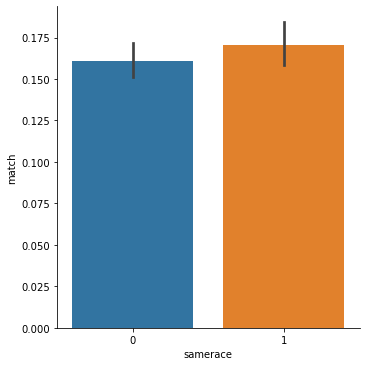

In [85]:
sns.catplot(x = 'samerace', y = 'match', data = speed_dating, kind = 'bar'  )
plt.show()

It firstly appears that a common race makes it a little easier match, but given the confidence intervals we can say that it is not really significative.

## Global participant information 

### Goal
"What is your primary goal in participating in this event ?"

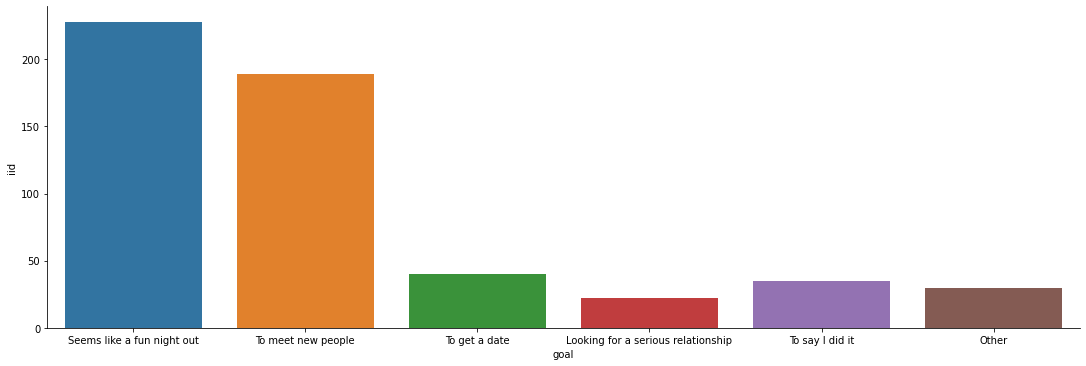

In [86]:
temp_df = sd_group_iid.groupby('goal').count().reset_index()
temp_df.loc[temp_df.goal == 1,['goal']] ='Seems like a fun night out'
temp_df.loc[temp_df.goal == 2,['goal']] ='To meet new people'
temp_df.loc[temp_df.goal == 3,['goal']] ='To get a date'
temp_df.loc[temp_df.goal == 4,['goal']] ='Looking for a serious relationship'
temp_df.loc[temp_df.goal == 5,['goal']] ='To say I did it'
temp_df.loc[temp_df.goal == 6,['goal']] ='Other'

sns.catplot(x = 'goal', y = 'iid', data = temp_df, kind = 'bar', height = 5, aspect = 3  )
plt.show()

Most people said they came here not to find love or even a date, but mostly for fun and meeting new people.

## Date
"In general, how frequently do you go on dates? "

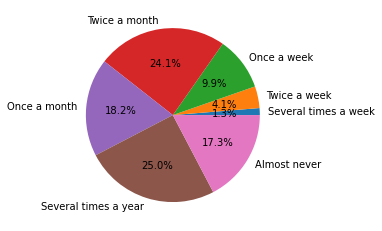

In [69]:
temp_df = sd_group_iid.groupby('date').count().reset_index()
temp_df.loc[temp_df.date == 1,['date']] ='Several times a week'
temp_df.loc[temp_df.date == 2,['date']] ='Twice a week'
temp_df.loc[temp_df.date == 3,['date']] ='Once a week'
temp_df.loc[temp_df.date == 4,['date']] ='Twice a month'
temp_df.loc[temp_df.date == 5,['date']] ='Once a month'
temp_df.loc[temp_df.date == 6,['date']] ='Several times a year'
temp_df.loc[temp_df.date == 7,['date']] ='Almost never'

plt.pie(x = temp_df.iid, labels = temp_df.date, autopct = '%1.1f%%')
plt.show()

## Go out
"How often do you go out (not necessarily on dates)?"

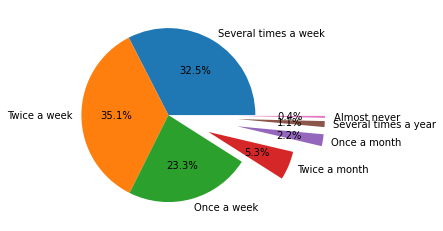

In [76]:
temp_df = sd_group_iid.groupby('go_out').count().reset_index()
temp_df.loc[temp_df.go_out == 1,['go_out']] ='Several times a week'
temp_df.loc[temp_df.go_out == 2,['go_out']] ='Twice a week'
temp_df.loc[temp_df.go_out == 3,['go_out']] ='Once a week'
temp_df.loc[temp_df.go_out == 4,['go_out']] ='Twice a month'
temp_df.loc[temp_df.go_out == 5,['go_out']] ='Once a month'
temp_df.loc[temp_df.go_out == 6,['go_out']] ='Several times a year'
temp_df.loc[temp_df.go_out == 7,['go_out']] ='Almost never'


explode = (0,0,0,0.5,0.8,0.8,0.8)
plt.pie(x = temp_df.iid, labels = temp_df.go_out, autopct = '%1.1f%%', explode = explode)
plt.show()

## Happiness expectation
"Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?"


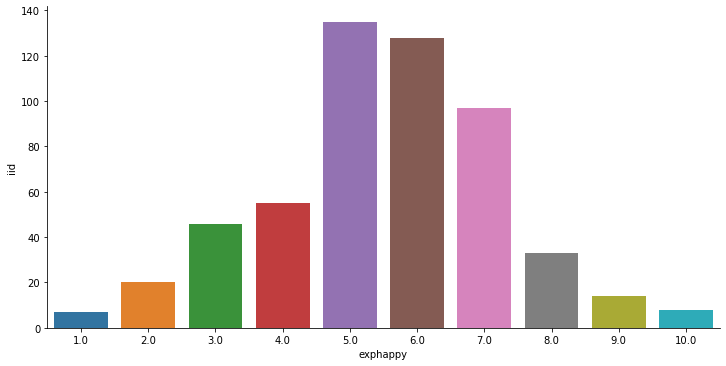

In [82]:
sns.catplot(x = 'exphappy', y = 'iid', data = sd_group_iid.groupby('exphappy').count().reset_index(), kind = 'bar', height = 5, aspect = 2    )
plt.show()

Most people are between 5 and 7 so a little enthousiast about the event, but not so much.

## Number of intersted persons expected
"Out of the 20 people you will meet, how many do you expect will be interested in dating you? "

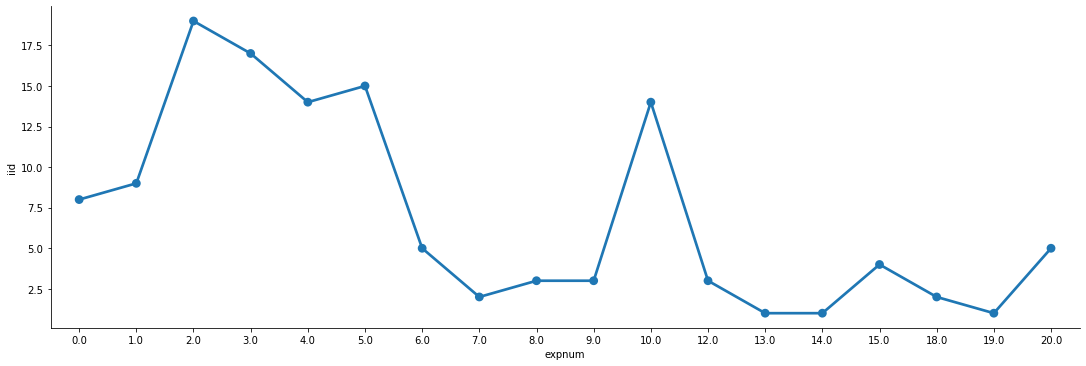

In [89]:
sns.catplot(x = 'expnum', y = 'iid', data = sd_group_iid.groupby('expnum').count().reset_index(), kind = 'point', height = 5, aspect = 3)
plt.show()

Most people think that less than 6 persons over 20 will be interested in them. We also see a peak at "10" : around 15 persons think they will please to half the people they will meet !

<b>Could be interesting to look if confident persons are more likely to please other people :</b>

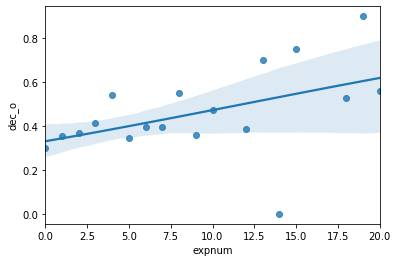

In [91]:
sns.regplot(x = speed_dating.groupby('expnum').count().reset_index().expnum, y = speed_dating.groupby('expnum').mean().reset_index().dec_o,  logistic = True)
plt.show()

If we delete the outlier at 'expnum' = 14, we see that the regression is pretty good. Confident people (who expected higher person number to be interested in them) are the persons who gets more interest.